In [13]:
library(dplyr)
library(RSQLite)
library(DBI)
library(ggplot2)
library(rmarkdown)

In [14]:
#Loading the pew data
pewData = read.csv("Data/pewData/pewData.csv", header=TRUE)
pewData
summary(mydata)

psraid,sample,int_date,lang,usr,cregion,state,form,sex,q1,⋯,ideo,hisp,birth_hisp,race,inc,ql1a,qc1,zipcode,weight,standwt
100006,1,61015,1,S,3,51,1,2,1,⋯,1,2,NA,1,99,NA,NA,20112,2.258065,0.7209406
100009,1,61015,1,U,3,24,2,2,2,⋯,3,2,NA,2,6,NA,NA,21239,2.548387,0.8136330
100011,1,61015,1,S,2,39,2,2,1,⋯,1,2,NA,1,3,NA,NA,44730,1.806452,0.5767525
100039,1,61015,1,S,3,37,2,2,1,⋯,2,2,NA,1,6,NA,NA,27028,5.032258,1.6066676
100040,1,61015,1,U,3,21,1,2,1,⋯,1,2,NA,1,3,2,NA,40511,7.161290,2.2864116
100043,1,62215,1,R,2,20,1,2,1,⋯,3,2,NA,1,8,NA,NA,67601,1.000000,0.3192737
100049,1,61015,1,R,1,42,1,1,1,⋯,1,2,NA,1,99,NA,NA,15748,1.387097,0.4428635
100051,1,61915,1,R,2,26,1,1,1,⋯,2,2,NA,1,7,NA,NA,49690,1.645161,0.5252567
100058,1,61015,1,R,3,40,2,1,2,⋯,5,2,NA,1,6,NA,NA,73655,1.000000,0.3192737
100059,1,61015,1,U,1,23,1,1,3,⋯,4,2,NA,1,3,NA,NA,4412,2.935484,0.9372228


ERROR: Error in summary(mydata): object 'mydata' not found


In [15]:
pewData
pewData1 <- pewData[!is.na(pewData$sex) & !is.na(pewData$race),]
pewData1 <- pewData1[pewData1$q1 !='8' & pewData1$q1 !='9' & pewData1$race!='8' & pewData1$race !='9' & !is.na(pewData1$q1)  ,]

nrow(pewData1)
ncol(pewData1)

psraid,sample,int_date,lang,usr,cregion,state,form,sex,q1,⋯,ideo,hisp,birth_hisp,race,inc,ql1a,qc1,zipcode,weight,standwt
100006,1,61015,1,S,3,51,1,2,1,⋯,1,2,NA,1,99,NA,NA,20112,2.258065,0.7209406
100009,1,61015,1,U,3,24,2,2,2,⋯,3,2,NA,2,6,NA,NA,21239,2.548387,0.8136330
100011,1,61015,1,S,2,39,2,2,1,⋯,1,2,NA,1,3,NA,NA,44730,1.806452,0.5767525
100039,1,61015,1,S,3,37,2,2,1,⋯,2,2,NA,1,6,NA,NA,27028,5.032258,1.6066676
100040,1,61015,1,U,3,21,1,2,1,⋯,1,2,NA,1,3,2,NA,40511,7.161290,2.2864116
100043,1,62215,1,R,2,20,1,2,1,⋯,3,2,NA,1,8,NA,NA,67601,1.000000,0.3192737
100049,1,61015,1,R,1,42,1,1,1,⋯,1,2,NA,1,99,NA,NA,15748,1.387097,0.4428635
100051,1,61915,1,R,2,26,1,1,1,⋯,2,2,NA,1,7,NA,NA,49690,1.645161,0.5252567
100058,1,61015,1,R,3,40,2,1,2,⋯,5,2,NA,1,6,NA,NA,73655,1.000000,0.3192737
100059,1,61015,1,U,1,23,1,1,3,⋯,4,2,NA,1,3,NA,NA,4412,2.935484,0.9372228


[1] 1936

[1] 140

<h1>Race and Community Analysis</h1>
<h3>Question 1</h3> How people from different races and sex rate their community as a place to live?
<h3>Hypothesis</h3> From the plot we can see that majority pf the poeple in each of the races have rated their community as
good. It shows that people are content with their current life and community. Its an indication for communal harmony. 
This graph also shows the proportion of each of the races in United States.Its also interesting to note that both
male and female are contempt with thier community.

In [ ]:
### Race and Community Analysis###
#Question 1 - How people from different races and sex rate their community as a place to live?
#Hypothesis - From the plot we can see that majority pf the poeple in each of the races have rated their community as
# good. It shows that people are content with their current life and community. Its an indication for communal harmony. 
# This graph also shows the proportion of each of the races in United States.Its also interesting to note that both
# male and female are contempt with thier community.

pewData1 <- within(pewData1, q1 <- factor(q1, labels = c('Excellent','Good','Only fair','Poor')))
pewData1 <- within(pewData1, sex <- factor(sex, labels = c('Male', 'Female')))
pewData1 <- within(pewData1, race <- factor(race, labels = c('White', 'African-American','Asian','Mixed race','Native American','Other')))

qplot(sex, race, color=q1, data=pewData1, geom="jitter" )

write.csv(pewData1, file = "Data/pewData1.csv")

<h1>Internet Usage Analysis</h1>
<h3>Question 2</h3> What is the Relation between age, sex and how offen people use internet?
<h3>Hypothesis</h3> The resultant graphs are interesting. Although internet is being used several times a day by people 
in the age groups 20 to 60 in both sexes, its quite evident that males of age 20 to 40 are contantly using the internet 
the most.

In [17]:
### Internet Usage Analysis###
#Question 2 - What is the Relation between age, sex and how offen people use internet?
#Hypothesis - The resultant graphs are interesting. Although internet is being used several times a day by people 
# in the age groups 20 to 60 in both sexes, its quite evident that males of age 20 to 40 are contantly using the internet 
# the most.

pewData
pewData2 <- pewData[!is.na(pewData$sex),]
pewData2 <- pewData2[pewData2$intfreq !='8' & pewData2$intfreq !='9' & pewData2$age !='98' & pewData2$age !='99' ,]

cat("row pewData",nrow(pewData))
cat("\ncol pewData",ncol(pewData))
cat("\nrow pewData2",nrow(pewData2))
cat("\ncol pewData2",ncol(pewData2))

psraid,sample,int_date,lang,usr,cregion,state,form,sex,q1,⋯,ideo,hisp,birth_hisp,race,inc,ql1a,qc1,zipcode,weight,standwt
100006,1,61015,1,S,3,51,1,2,1,⋯,1,2,NA,1,99,NA,NA,20112,2.258065,0.7209406
100009,1,61015,1,U,3,24,2,2,2,⋯,3,2,NA,2,6,NA,NA,21239,2.548387,0.8136330
100011,1,61015,1,S,2,39,2,2,1,⋯,1,2,NA,1,3,NA,NA,44730,1.806452,0.5767525
100039,1,61015,1,S,3,37,2,2,1,⋯,2,2,NA,1,6,NA,NA,27028,5.032258,1.6066676
100040,1,61015,1,U,3,21,1,2,1,⋯,1,2,NA,1,3,2,NA,40511,7.161290,2.2864116
100043,1,62215,1,R,2,20,1,2,1,⋯,3,2,NA,1,8,NA,NA,67601,1.000000,0.3192737
100049,1,61015,1,R,1,42,1,1,1,⋯,1,2,NA,1,99,NA,NA,15748,1.387097,0.4428635
100051,1,61915,1,R,2,26,1,1,1,⋯,2,2,NA,1,7,NA,NA,49690,1.645161,0.5252567
100058,1,61015,1,R,3,40,2,1,2,⋯,5,2,NA,1,6,NA,NA,73655,1.000000,0.3192737
100059,1,61015,1,U,1,23,1,1,3,⋯,4,2,NA,1,3,NA,NA,4412,2.935484,0.9372228


row pewData 2001
col pewData 140
row pewData2 1947
col pewData2 140

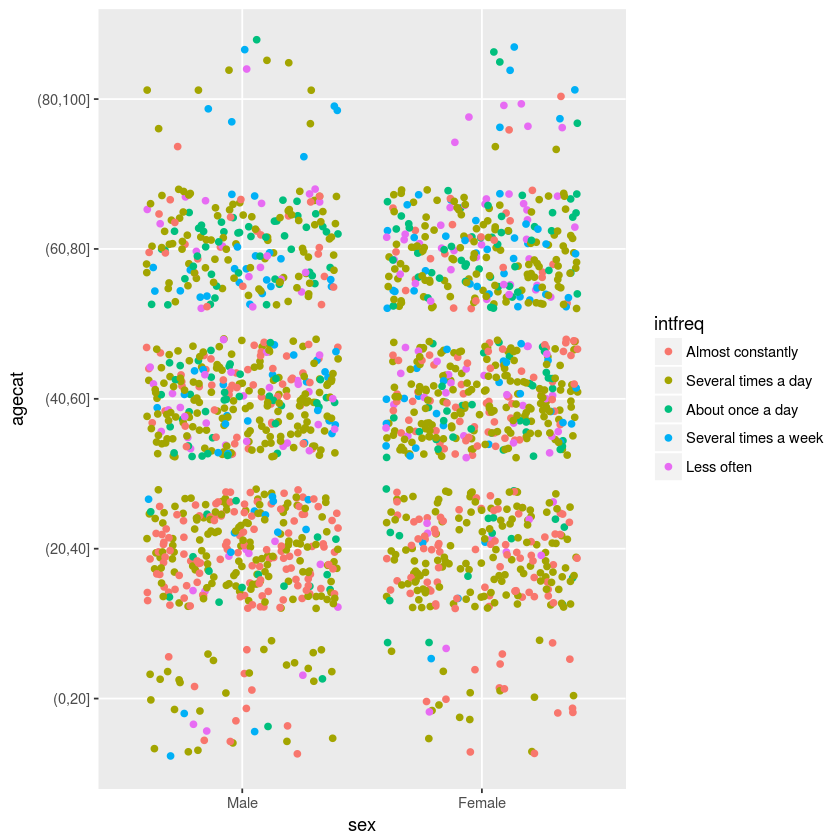

In [18]:
pewData2$agecat<- cut(pewData2$age, c(0,20,40,60,80,100))
pewData2 <- within(pewData2, intfreq <- factor(intfreq, labels = c('Almost constantly', 'Several times a day','About once a day','Several times a week','Less often')))
pewData2<- pewData2[!is.na(pewData2$agecat),]
pewData2 <- within(pewData2,sex<- factor(sex, labels = c('Male', 'Female')))
#pewData2$agecat

qplot(sex, agecat, color=intfreq, data=pewData2, geom = "jitter")
write.csv(pewData2, file = "Data/pewData2.csv")

<h3>Question </h3>How does the income effect the internet usage frequency for different age categories?
<h3>Hypothesis</h3> There are 2 observations that can be made from the resultant graph. 
The first observation is that people in the age group 20-40 have high internet usage frequency irrespective of their 
income. This can be due to the fact that internet is a very import part of the academia and work.
Second Observation is that for people in age group 40-60 the income plays a role in deciding the internet usage 
frequency. Those with lower income uses internet less frequent than people of higher income. We can see that same 
trend in age group 60-80 but its not as intended as the age 40-60.

In [19]:
#Q3 How does the income effect the internet usage frequency for different age categories?
#Hypothesis - There are 2 observations that can be made from the resultant graph. 
# The first observation is that people in the age group 20-40 have high internet usage frequency irrespective of their 
# income. This can be due to the fact that internet is a very import part of the academia and work.
# Second Observation is that for people in age group 40-60 the income plays a role in deciding the internet usage 
# frequency. Those with lower income uses internet less frequent than people of higher income. We can see that same 
# trend in age group 60-80 but its not as intended as the age 40-60.
pewData
pewData3 <- pewData[!is.na(pewData$sex),]
pewData3 <- pewData3[pewData3$inc !='98' & pewData3$inc !='99' & pewData3$age !='98' & pewData3$age !='99' ,]
pewData3 <- pewData3[pewData3$intfreq !='8' & pewData3$intfreq !='9' & !is.na(pewData3$intfreq),]

cat("row pewData",nrow(pewData))
cat("\ncol pewData",ncol(pewData))
cat("\nrow pewData2",nrow(pewData3))
cat("\ncol pewData2",ncol(pewData3))

psraid,sample,int_date,lang,usr,cregion,state,form,sex,q1,⋯,ideo,hisp,birth_hisp,race,inc,ql1a,qc1,zipcode,weight,standwt
100006,1,61015,1,S,3,51,1,2,1,⋯,1,2,NA,1,99,NA,NA,20112,2.258065,0.7209406
100009,1,61015,1,U,3,24,2,2,2,⋯,3,2,NA,2,6,NA,NA,21239,2.548387,0.8136330
100011,1,61015,1,S,2,39,2,2,1,⋯,1,2,NA,1,3,NA,NA,44730,1.806452,0.5767525
100039,1,61015,1,S,3,37,2,2,1,⋯,2,2,NA,1,6,NA,NA,27028,5.032258,1.6066676
100040,1,61015,1,U,3,21,1,2,1,⋯,1,2,NA,1,3,2,NA,40511,7.161290,2.2864116
100043,1,62215,1,R,2,20,1,2,1,⋯,3,2,NA,1,8,NA,NA,67601,1.000000,0.3192737
100049,1,61015,1,R,1,42,1,1,1,⋯,1,2,NA,1,99,NA,NA,15748,1.387097,0.4428635
100051,1,61915,1,R,2,26,1,1,1,⋯,2,2,NA,1,7,NA,NA,49690,1.645161,0.5252567
100058,1,61015,1,R,3,40,2,1,2,⋯,5,2,NA,1,6,NA,NA,73655,1.000000,0.3192737
100059,1,61015,1,U,1,23,1,1,3,⋯,4,2,NA,1,3,NA,NA,4412,2.935484,0.9372228


row pewData 2001
col pewData 140
row pewData2 1476
col pewData2 140

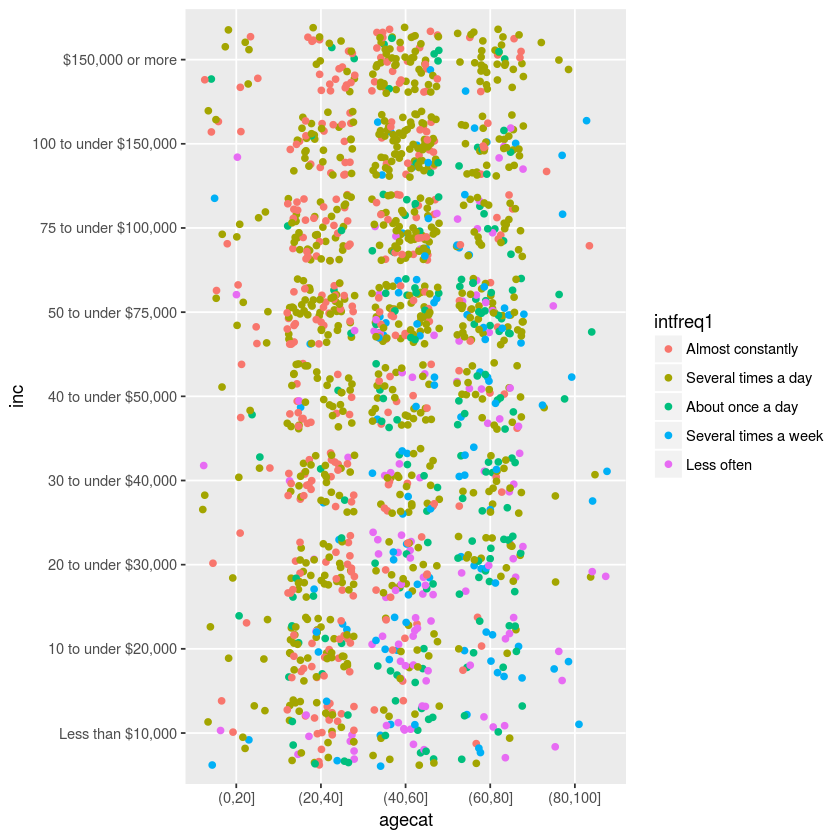

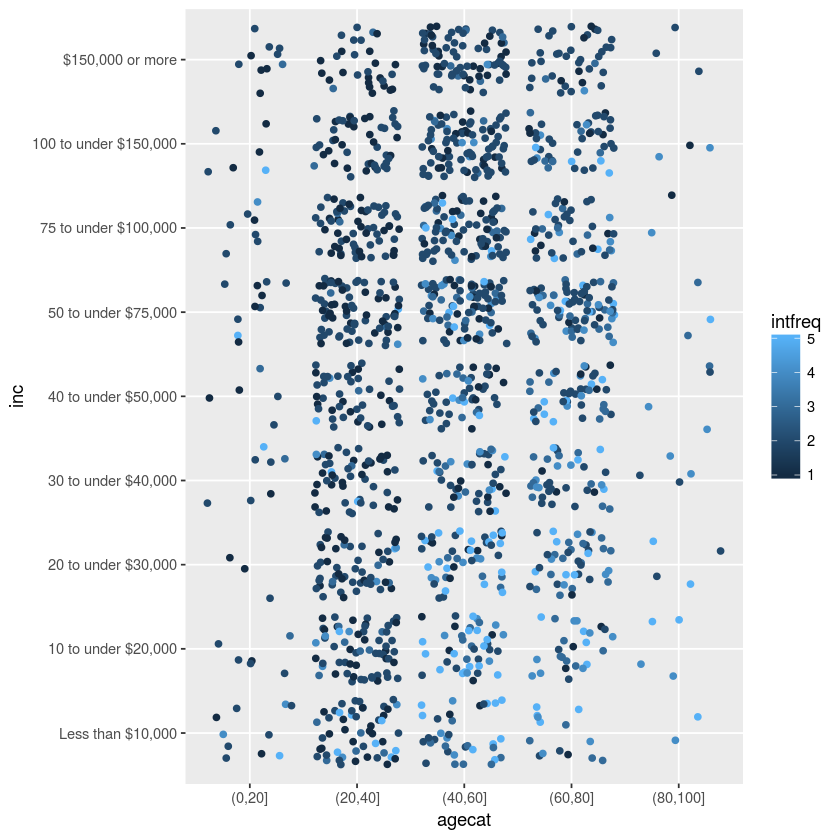

In [20]:
pewData3 <- within(pewData3,sex<- factor(sex, labels = c('Male', 'Female')))
pewData3 <- within(pewData3,inc<- factor(inc, labels = c('Less than $10,000', '10 to under $20,000',
                                                        '20 to under $30,000','30 to under $40,000','40 to under $50,000',
                                                         '50 to under $75,000','75 to under $100,000','100 to under $150,000',
                                                         '$150,000 or more'
                                                        )))
#pewData2$agecat
pewData3$agecat<- cut(pewData3$age, c(0,20,40,60,80,100))
pewData3 <- within(pewData3,intfreq1 <- factor(intfreq, labels = c('Almost constantly', 'Several times a day','About once a day','Several times a week','Less often')))

qplot(agecat, inc, color=intfreq1, data=pewData3, geom = "jitter")
qplot(agecat, inc, color=intfreq, data=pewData3, geom = "jitter")

write.csv(pewData3, file = "Data/pewData3.csv")

<h3>Overall usage of internet in our society.</h3>
<h3>Answer</h3> We can see that nearly half of the people in oir society uses internet several times a day. One fourth of the 
people constantly uses the internet. The remaining one fourth are the people who uses internet nit as frequent as the
other groups. Thier usage range from about once a day to few times per week to less often.


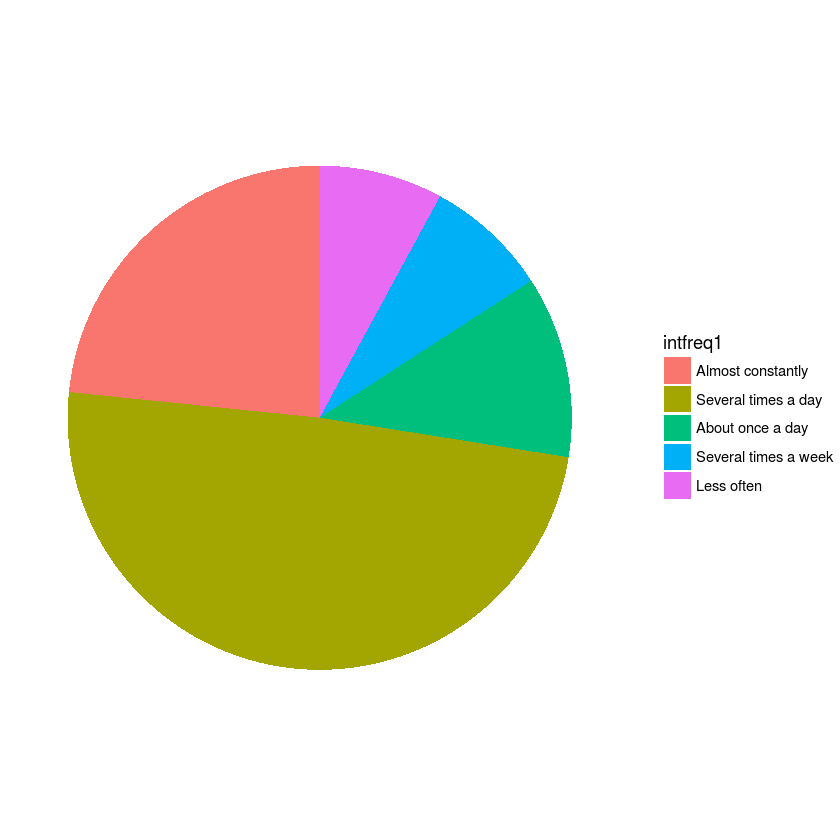

In [21]:
#Overall usage of internet in our society.
# Answer - we can see that nearly half of the people in oir society uses internet several times a day. One fourth of the 
# people constantly uses the internet. The remaining one fourth are the people who uses internet nit as frequent as the
# other groups. Thier usage range from about once a day to few times per week to less often.
blank_theme <- theme_minimal()+
  theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),
  panel.border = element_blank(),
  panel.grid=element_blank(),
  axis.ticks = element_blank(),
  plot.title=element_text(size=14, face="bold")
  )


pie <- ggplot(pewData3, aes(x=factor(1), fill=intfreq1))+
  geom_bar(width = 1)+
  coord_polar("y") + theme_void()

pie

<h1>Dating Site usage Analysis</h1>
<h3>Question 4</h3> Which age category of peopel uses online dating site such as Match.com, eHarmony, or OK Cupid the most?
<h3>hypothesis</h3> We get an interesting graph which can provid us multiple hypothesis regarding the usage of online dating
 for different sex and ages.
 The first hypothesis is that people of age group 20-70 actually uses the dating sites or in other word have 
 used/using dating to find partners. And it is evident that number of men who uses the dating sites are more than
 women in each of the age categories.
 Second Hypothesis is that males in age group 20-30(highest) and 40-50(second highest) uses the dating sites the most. 
 I can even go a step further to postulate the cause for the high usage of dating sites for these age categories 
 as - the need for finding a partner is high for males in category 20-30. Males in 40-50 age categories would be back on
 look for the next partner, probably after a failed relation. 
 Thrid Hypothesis - Women has lesser need to use dating site as they would be find partner without one.

<h3>Question 5</h3> Do race play a role in deciding Onine dating usage?
<h3>Hypothesis </h3> I would like to dig further into dating site usage given that males uses dating site more then female.
 We could see that white males are the most highest frequent user of dating site. The count is nearly double 
 that of the white females. Its also interesting to note that female African Americans uses dating site more than
 compared to male African American.  

<h3>Question 6</h3> How the annual income plays a role in deciding the usage of dating sites for male and female.
<h3>hypothesis</h3> There are not noticable pattern hence we can conclude that poeple who uses dating site is not decided
by thier income.

In [22]:
###Dating Site usage Analysis###
#Question 4 - Which age category of peopel uses online dating site such as Match.com, eHarmony, or OK Cupid the most?
#hypothesis - We get an interesting graph which can provid us multiple hypothesis regarding the usage of online dating
# for different sex and ages.
# The first hypothesis is that people of age group 20-70 actually uses the dating sites or in other word have 
# used/using dating to find partners. And it is evident that number of men who uses the dating sites are more than
# women in each of the age categories.
# Second Hypothesis is that males in age group 20-30(highest) and 40-50(second highest) uses the dating sites the most. 
# I can even go a step further to postulate the cause for the high usage of dating sites for these age categories 
# as - the need for finding a partner is high for males in category 20-30. Males in 40-50 age categories would be back on
# look for the next partner, probably after a failed relation. 
# Thrid Hypothesis - Women has lesser need to use dating site as they would be find partner without one.

#Qustion5 - Do race play a role in deciding Onine dating usage?
# Hypothesis - I would like to dig further into dating site usage given that males uses dating site more then female.
# We could see that white males are the most highest frequent user of dating site. The count is nearly double 
# that of the white females. Its also interesting to note that female African Americans uses dating site more than
# compared to male African American.  

#Question 6 - How the annual income plays a role in deciding the usage of dating sites for male and female.
#hypothesis - There are not noticable pattern hence we can conclude that poeple who uses dating site is not decided
#by thier income.
pewData
pewData4 <- pewData[!is.na(pewData$sex),]
pewData4 <- pewData4[pewData4$inc !='98' & pewData4$inc !='99' & pewData4$age !='98' & pewData4$age !='99' ,]
pewData4 <- pewData4[pewData4$intfreq !='8' & pewData4$intfreq !='9' & !is.na(pewData4$intfreq),]
pewData4 <- pewData4[pewData4$date1a !='8' & pewData4$date1a !='9' ,]
pewData4 <- pewData4[pewData4$race!='8' & pewData4$race !='9' & !is.na(pewData4$race), ]

cat("row pewData",nrow(pewData))
cat("\ncol pewData",ncol(pewData))
cat("\nrow pewData2",nrow(pewData4))
cat("\ncol pewData2",ncol(pewData4))


psraid,sample,int_date,lang,usr,cregion,state,form,sex,q1,⋯,ideo,hisp,birth_hisp,race,inc,ql1a,qc1,zipcode,weight,standwt
100006,1,61015,1,S,3,51,1,2,1,⋯,1,2,NA,1,99,NA,NA,20112,2.258065,0.7209406
100009,1,61015,1,U,3,24,2,2,2,⋯,3,2,NA,2,6,NA,NA,21239,2.548387,0.8136330
100011,1,61015,1,S,2,39,2,2,1,⋯,1,2,NA,1,3,NA,NA,44730,1.806452,0.5767525
100039,1,61015,1,S,3,37,2,2,1,⋯,2,2,NA,1,6,NA,NA,27028,5.032258,1.6066676
100040,1,61015,1,U,3,21,1,2,1,⋯,1,2,NA,1,3,2,NA,40511,7.161290,2.2864116
100043,1,62215,1,R,2,20,1,2,1,⋯,3,2,NA,1,8,NA,NA,67601,1.000000,0.3192737
100049,1,61015,1,R,1,42,1,1,1,⋯,1,2,NA,1,99,NA,NA,15748,1.387097,0.4428635
100051,1,61915,1,R,2,26,1,1,1,⋯,2,2,NA,1,7,NA,NA,49690,1.645161,0.5252567
100058,1,61015,1,R,3,40,2,1,2,⋯,5,2,NA,1,6,NA,NA,73655,1.000000,0.3192737
100059,1,61015,1,U,1,23,1,1,3,⋯,4,2,NA,1,3,NA,NA,4412,2.935484,0.9372228


row pewData 2001
col pewData 140
row pewData2 1449
col pewData2 140

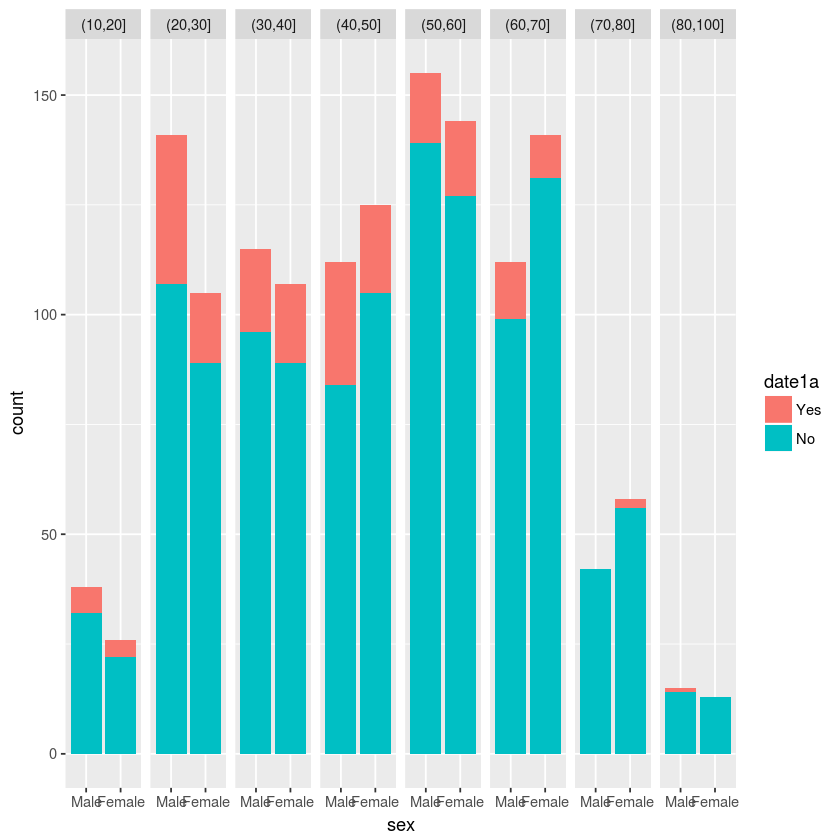

In [24]:
pewData4$agecat<- cut(pewData4$age, c(0,10,20,30,40,50,60,70,80,100))
pewData4 <- within(pewData4,sex<- factor(sex, labels = c('Male', 'Female')))

pewData4 <- within(pewData4, race <- factor(race, labels = c('White', 'African-American','Asian',
                                                             'Mixed race','Native American','Other')))


pewData4 <- within(pewData4,date1a<- factor(date1a, labels = c('Yes', 'No')))
pewData4 <- within(pewData4,inc<- factor(inc, labels = c('Less than $10,000', '10 to under $20,000',
                                                        '20 to under $30,000','30 to under $40,000','40 to under $50,000',
                                                         '50 to under $75,000','75 to under $100,000','100 to under $150,000',
                                                         '$150,000 or more'
                                                        )))

#plot for question4
qplot(sex, data=pewData4, geom ="bar", facets = . ~ agecat, fill=date1a)


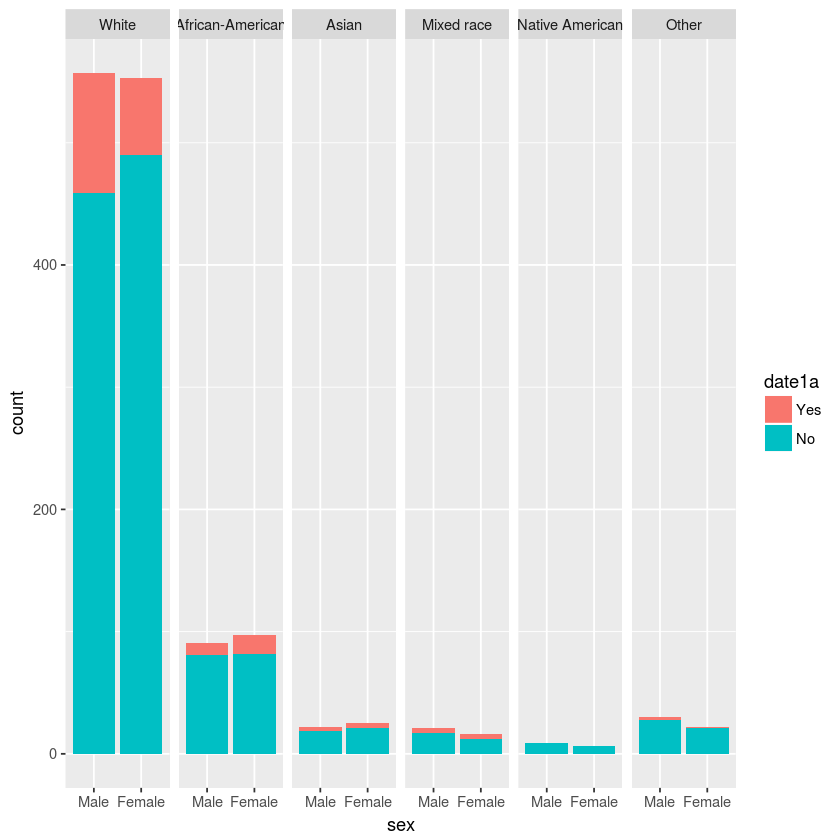

In [25]:
#plot for question5
qplot(sex, data=pewData4, geom ="bar", facets = . ~ race, fill=date1a)

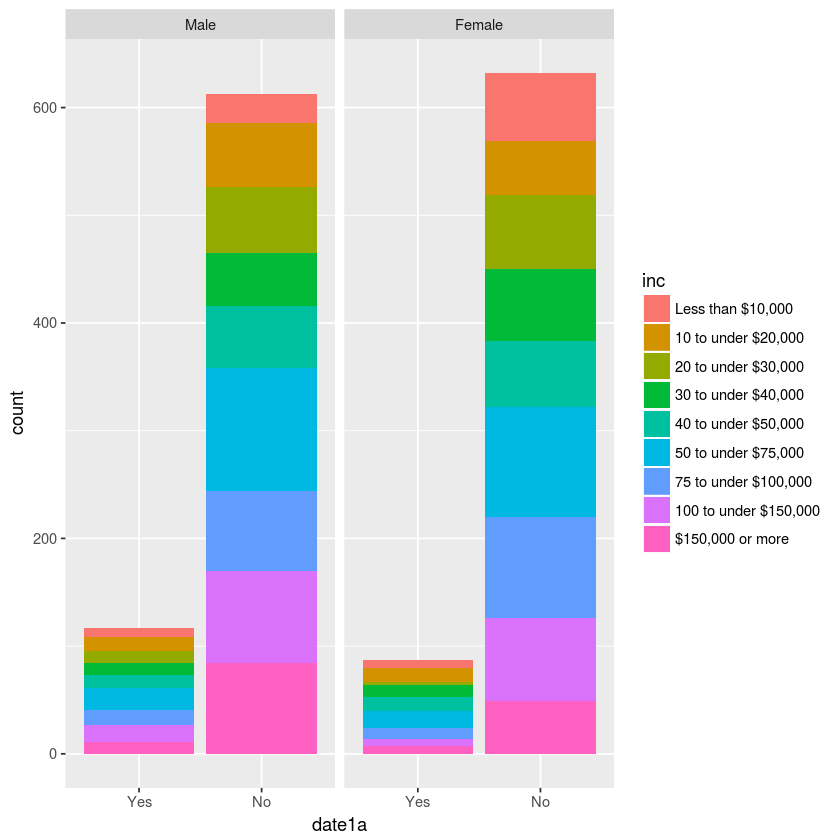

In [26]:
#plot for question6
qplot(date1a, data=pewData4, geom ="bar", facets = . ~ sex, fill=inc)

write.csv(pewData4, file = "Data/pewData4.csv")